In [1]:
import sys
CODE_DIR = "/home/cbarkhof/fall-2021"
sys.path.append(CODE_DIR)

In [15]:
import os
import torch
import pandas as pd
import numpy as np

%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns; sns.set()
import torch.distributions as td


from datasets import load_dataset, ReadInstruction

from clean_analysis.dp_mixture_for_surprisals import *
from clean_analysis.utils.PTB_preprocessing_steps import make_run_overview_df
from clean_analysis.generative_analysis_models.generative_topic_model_ptb import GenLDATopicModelPTB


# Get some PTB data (train & valid)

In [3]:
MAX_DATA_SAMPLES = 10000

# PENN TREE BANK
ptb_train_dataset = load_dataset("ptb_text_only", ignore_verifications=True, split="train")
ptb_train_text_samples = ptb_train_dataset["sentence"][:MAX_DATA_SAMPLES]

ptb_valid_dataset = load_dataset("ptb_text_only", ignore_verifications=True, split="validation")
ptb_valid_text_samples = ptb_valid_dataset["sentence"][:MAX_DATA_SAMPLES]

print(f"Len train samples", len(ptb_train_text_samples))
# print(f"Example train sample:\n\n{ptb_train_text_samples[0]}", end="\n\n")

print(f"Len valid samples", len(ptb_valid_text_samples))
# print(f"Example valid sample:\n\n{ptb_valid_text_samples[0]}")

W0104 08:12:20.026578 23131099492096 builder.py:539] Reusing dataset ptb_text_only (/home/cbarkhof/.cache/huggingface/datasets/ptb_text_only/penn_treebank/1.1.0/8d1b97746fb9765d140e569ec5ddd35e20af4d37761f5e1bf357ea0b081f2c1f)
W0104 08:12:20.523965 23131099492096 builder.py:539] Reusing dataset ptb_text_only (/home/cbarkhof/.cache/huggingface/datasets/ptb_text_only/penn_treebank/1.1.0/8d1b97746fb9765d140e569ec5ddd35e20af4d37761f5e1bf357ea0b081f2c1f)


Len train samples 10000
Len valid samples 3370


# Generative LDA Model PTB

In [4]:
gen_topic_model = GenLDATopicModelPTB(
    train_samples_strings=ptb_train_text_samples, 
    num_topics=10, 
    chunksize=2000, 
    passes=20, 
    iterations=600, 
    eval_every=None)

I0104 08:12:22.363510 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:12:22.365626 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:12:22.480239 23131099492096 phrases.py:609] collected 82407 token types (unigram + bigrams) from a corpus of 121114 words and 10000 sentences
I0104 08:12:22.482397 23131099492096 phrases.py:666] merged Phrases<82407 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>
I0104 08:12:22.485692 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<82407 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000> in 0.12s', 'datetime': '2022-01-04T08:12:22.484928', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:12:22.695148 23131099492096 dictionary.py:199] adding document #0 to Dictionary(0 unique tokens

Number of unique tokens: 3743
Number of documents: 10000


I0104 08:12:23.355364 23131099492096 gensim_LDA.py:448] using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
I0104 08:12:23.357899 23131099492096 gensim_LDA.py:339] using serial LDA version on this node
I0104 08:12:23.363055 23131099492096 gensim_LDA.py:782] running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 10000 documents, updating model once every 2000 documents, evaluating perplexity every 0 documents, iterating 600x with a convergence threshold of 0.001000
I0104 08:12:23.364931 23131099492096 gensim_LDA.py:831] PROGRESS: pass 0, at document #2000/10000
I0104 08:12:24.016615 23131099492096 gensim_LDA.py:634] optimized alpha [0.08147891, 0.07961349, 0.077673405, 0.082926095, 0.08500568, 0.08378204, 0.08051791, 0.08492653, 0.08309759, 0.08069363]
I0104 08:12:24.020255 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:24.023704 23131099492096 gensi

I0104 08:12:25.736018 23131099492096 gensim_LDA.py:1033] topic #7 (0.100): 0.026*"stock" + 0.020*"trading" + 0.018*"market" + 0.015*"program" + 0.013*"new" + 0.012*"index" + 0.011*"mr" + 0.010*"exchange" + 0.009*"program_trading" + 0.007*"share"
I0104 08:12:25.737497 23131099492096 gensim_LDA.py:1033] topic #4 (0.103): 0.041*"million" + 0.040*"year" + 0.016*"billion" + 0.012*"sale" + 0.012*"share" + 0.010*"company" + 0.009*"month" + 0.008*"rate" + 0.008*"corp" + 0.008*"two"
I0104 08:12:25.738950 23131099492096 gensim_LDA.py:900] topic diff=0.382117, rho=0.447214
I0104 08:12:25.744292 23131099492096 gensim_LDA.py:831] PROGRESS: pass 1, at document #2000/10000
I0104 08:12:26.116830 23131099492096 gensim_LDA.py:634] optimized alpha [0.08836548, 0.08042905, 0.080068976, 0.0894439, 0.102604926, 0.094529316, 0.08361434, 0.09804302, 0.09239796, 0.08747381]
I0104 08:12:26.120420 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:26

I0104 08:12:27.541170 23131099492096 gensim_LDA.py:1033] topic #5 (0.106): 0.023*"mr" + 0.018*"would" + 0.015*"company" + 0.012*"could" + 0.009*"also" + 0.009*"agreement" + 0.008*"business" + 0.008*"day" + 0.008*"soviet" + 0.007*"union"
I0104 08:12:27.542702 23131099492096 gensim_LDA.py:1033] topic #7 (0.110): 0.032*"stock" + 0.025*"trading" + 0.022*"market" + 0.018*"program" + 0.015*"index" + 0.015*"new" + 0.012*"exchange" + 0.010*"program_trading" + 0.010*"mr" + 0.009*"big"
I0104 08:12:27.544155 23131099492096 gensim_LDA.py:1033] topic #4 (0.121): 0.044*"year" + 0.043*"million" + 0.020*"billion" + 0.014*"share" + 0.013*"sale" + 0.011*"company" + 0.011*"month" + 0.009*"quarter" + 0.008*"earlier" + 0.008*"three"
I0104 08:12:27.545602 23131099492096 gensim_LDA.py:900] topic diff=0.245084, rho=0.377964
I0104 08:12:27.551013 23131099492096 gensim_LDA.py:831] PROGRESS: pass 2, at document #2000/10000
I0104 08:12:27.880464 23131099492096 gensim_LDA.py:634] optimized alpha [0.095470905, 0.08

I0104 08:12:29.227440 23131099492096 gensim_LDA.py:1033] topic #6 (0.096): 0.014*"bond" + 0.011*"mr" + 0.010*"worker" + 0.009*"would" + 0.009*"due" + 0.009*"house" + 0.008*"say" + 0.008*"time" + 0.008*"day" + 0.007*"proposal"
I0104 08:12:29.229308 23131099492096 gensim_LDA.py:1033] topic #5 (0.118): 0.024*"mr" + 0.018*"would" + 0.013*"company" + 0.012*"could" + 0.010*"also" + 0.010*"agreement" + 0.008*"day" + 0.008*"business" + 0.008*"union" + 0.007*"soviet"
I0104 08:12:29.231015 23131099492096 gensim_LDA.py:1033] topic #7 (0.122): 0.036*"stock" + 0.027*"trading" + 0.025*"market" + 0.019*"program" + 0.017*"index" + 0.017*"new" + 0.014*"exchange" + 0.011*"big" + 0.010*"program_trading" + 0.010*"york"
I0104 08:12:29.232609 23131099492096 gensim_LDA.py:1033] topic #4 (0.141): 0.047*"year" + 0.042*"million" + 0.021*"billion" + 0.015*"month" + 0.014*"sale" + 0.014*"share" + 0.011*"company" + 0.010*"quarter" + 0.009*"three" + 0.008*"earlier"
I0104 08:12:29.234202 23131099492096 gensim_LDA.py

I0104 08:12:30.860588 23131099492096 gensim_LDA.py:1033] topic #1 (0.102): 0.025*"president" + 0.022*"mr" + 0.020*"executive" + 0.014*"co" + 0.014*"chief" + 0.012*"company" + 0.011*"chairman" + 0.011*"office" + 0.011*"vice" + 0.010*"say"
I0104 08:12:30.862188 23131099492096 gensim_LDA.py:1033] topic #6 (0.103): 0.015*"bond" + 0.012*"mr" + 0.010*"worker" + 0.009*"would" + 0.009*"house" + 0.009*"due" + 0.009*"say" + 0.008*"time" + 0.007*"day" + 0.007*"proposal"
I0104 08:12:30.863667 23131099492096 gensim_LDA.py:1033] topic #5 (0.131): 0.024*"mr" + 0.017*"would" + 0.013*"could" + 0.013*"company" + 0.010*"also" + 0.010*"agreement" + 0.008*"day" + 0.008*"union" + 0.008*"business" + 0.007*"soviet"
I0104 08:12:30.865130 23131099492096 gensim_LDA.py:1033] topic #7 (0.134): 0.038*"stock" + 0.028*"trading" + 0.027*"market" + 0.021*"program" + 0.019*"new" + 0.017*"index" + 0.014*"exchange" + 0.012*"york" + 0.012*"new_york" + 0.012*"big"
I0104 08:12:30.866584 23131099492096 gensim_LDA.py:1033] top

I0104 08:12:32.450829 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:32.454139 23131099492096 gensim_LDA.py:1033] topic #1 (0.110): 0.026*"president" + 0.023*"mr" + 0.021*"executive" + 0.014*"co" + 0.014*"chief" + 0.013*"company" + 0.012*"chairman" + 0.011*"office" + 0.011*"vice" + 0.011*"say"
I0104 08:12:32.455705 23131099492096 gensim_LDA.py:1033] topic #6 (0.110): 0.015*"bond" + 0.013*"mr" + 0.010*"worker" + 0.010*"would" + 0.009*"say" + 0.009*"house" + 0.009*"due" + 0.008*"time" + 0.007*"day" + 0.007*"proposal"
I0104 08:12:32.457198 23131099492096 gensim_LDA.py:1033] topic #5 (0.143): 0.025*"mr" + 0.017*"would" + 0.013*"could" + 0.012*"company" + 0.010*"also" + 0.010*"agreement" + 0.008*"day" + 0.008*"union" + 0.008*"business" + 0.007*"british"
I0104 08:12:32.458718 23131099492096 gensim_LDA.py:1033] topic #7 (0.145): 0.040*"stock" + 0.029*"trading" + 0.028*"market" + 0.022*"program" + 0.021*"new" + 0.018*"index" + 

I0104 08:12:34.039470 23131099492096 gensim_LDA.py:634] optimized alpha [0.13222857, 0.1169754, 0.13433886, 0.14967167, 0.20237239, 0.15503523, 0.11726497, 0.15569532, 0.1482841, 0.13166821]
I0104 08:12:34.043074 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:34.046553 23131099492096 gensim_LDA.py:1033] topic #1 (0.117): 0.027*"president" + 0.023*"mr" + 0.022*"executive" + 0.014*"chief" + 0.014*"co" + 0.013*"company" + 0.013*"chairman" + 0.011*"vice" + 0.011*"office" + 0.011*"say"
I0104 08:12:34.048317 23131099492096 gensim_LDA.py:1033] topic #6 (0.117): 0.016*"bond" + 0.014*"mr" + 0.010*"worker" + 0.010*"would" + 0.009*"say" + 0.009*"due" + 0.008*"time" + 0.008*"house" + 0.008*"proposal" + 0.007*"day"
I0104 08:12:34.049967 23131099492096 gensim_LDA.py:1033] topic #5 (0.155): 0.026*"mr" + 0.017*"would" + 0.014*"could" + 0.011*"company" + 0.010*"also" + 0.010*"agreement" + 0.008*"union" + 0.008*"day" + 0.007*"business" +

I0104 08:12:35.303267 23131099492096 gensim_LDA.py:900] topic diff=0.072394, rho=0.288675
I0104 08:12:35.308509 23131099492096 gensim_LDA.py:831] PROGRESS: pass 6, at document #10000/10000
I0104 08:12:35.600236 23131099492096 gensim_LDA.py:634] optimized alpha [0.14117827, 0.1236835, 0.14597662, 0.16156012, 0.22124727, 0.16646893, 0.1243939, 0.16627645, 0.15963821, 0.14001274]
I0104 08:12:35.603885 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:35.607156 23131099492096 gensim_LDA.py:1033] topic #1 (0.124): 0.028*"president" + 0.024*"mr" + 0.022*"executive" + 0.014*"chief" + 0.014*"co" + 0.013*"company" + 0.013*"chairman" + 0.012*"vice" + 0.012*"office" + 0.011*"say"
I0104 08:12:35.608686 23131099492096 gensim_LDA.py:1033] topic #6 (0.124): 0.016*"bond" + 0.014*"mr" + 0.010*"worker" + 0.010*"would" + 0.010*"say" + 0.009*"due" + 0.008*"time" + 0.008*"proposal" + 0.008*"house" + 0.007*"case"
I0104 08:12:35.610164 231310994

I0104 08:12:36.855878 23131099492096 gensim_LDA.py:900] topic diff=0.065857, rho=0.277350
I0104 08:12:36.861110 23131099492096 gensim_LDA.py:831] PROGRESS: pass 7, at document #10000/10000
I0104 08:12:37.150920 23131099492096 gensim_LDA.py:634] optimized alpha [0.15014084, 0.12979893, 0.15740152, 0.17321463, 0.23957697, 0.17763676, 0.13154583, 0.17655419, 0.17124702, 0.14798996]
I0104 08:12:37.154609 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:37.157953 23131099492096 gensim_LDA.py:1033] topic #1 (0.130): 0.028*"president" + 0.024*"mr" + 0.022*"executive" + 0.014*"chief" + 0.014*"co" + 0.013*"chairman" + 0.013*"company" + 0.012*"vice" + 0.012*"office" + 0.011*"say"
I0104 08:12:37.159546 23131099492096 gensim_LDA.py:1033] topic #6 (0.132): 0.016*"bond" + 0.014*"mr" + 0.010*"would" + 0.010*"worker" + 0.010*"say" + 0.009*"due" + 0.008*"time" + 0.008*"proposal" + 0.008*"case" + 0.008*"issue"
I0104 08:12:37.161030 2313109

I0104 08:12:38.408898 23131099492096 gensim_LDA.py:1033] topic #4 (0.253): 0.055*"year" + 0.043*"million" + 0.024*"billion" + 0.019*"month" + 0.017*"sale" + 0.013*"share" + 0.011*"company" + 0.010*"last" + 0.010*"quarter" + 0.009*"three"
I0104 08:12:38.410370 23131099492096 gensim_LDA.py:900] topic diff=0.060764, rho=0.267261
I0104 08:12:38.415696 23131099492096 gensim_LDA.py:831] PROGRESS: pass 8, at document #10000/10000
I0104 08:12:38.700416 23131099492096 gensim_LDA.py:634] optimized alpha [0.15851922, 0.13569345, 0.16853075, 0.18499891, 0.25742352, 0.18881926, 0.1383788, 0.1864389, 0.18222752, 0.15555863]
I0104 08:12:38.704057 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:38.707698 23131099492096 gensim_LDA.py:1033] topic #1 (0.136): 0.029*"president" + 0.024*"mr" + 0.023*"executive" + 0.015*"chief" + 0.014*"co" + 0.013*"chairman" + 0.013*"company" + 0.012*"vice" + 0.012*"office" + 0.011*"say"
I0104 08:12:38.70953

I0104 08:12:39.959607 23131099492096 gensim_LDA.py:1033] topic #4 (0.270): 0.056*"year" + 0.043*"million" + 0.024*"billion" + 0.019*"month" + 0.017*"sale" + 0.013*"share" + 0.011*"company" + 0.010*"last" + 0.010*"quarter" + 0.009*"three"
I0104 08:12:39.961015 23131099492096 gensim_LDA.py:900] topic diff=0.057344, rho=0.258199
I0104 08:12:39.966326 23131099492096 gensim_LDA.py:831] PROGRESS: pass 9, at document #10000/10000
I0104 08:12:40.253979 23131099492096 gensim_LDA.py:634] optimized alpha [0.16655235, 0.14127715, 0.17923763, 0.19653055, 0.2747977, 0.19961652, 0.14513575, 0.1957823, 0.19273555, 0.1627511]
I0104 08:12:40.257618 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:40.260885 23131099492096 gensim_LDA.py:1033] topic #1 (0.141): 0.029*"president" + 0.025*"mr" + 0.023*"executive" + 0.015*"chief" + 0.015*"co" + 0.013*"chairman" + 0.012*"company" + 0.012*"vice" + 0.012*"office" + 0.011*"say"
I0104 08:12:40.262440

I0104 08:12:41.516465 23131099492096 gensim_LDA.py:1033] topic #5 (0.206): 0.030*"mr" + 0.016*"could" + 0.015*"would" + 0.010*"also" + 0.010*"company" + 0.009*"agreement" + 0.008*"day" + 0.007*"government" + 0.007*"british" + 0.006*"official"
I0104 08:12:41.518075 23131099492096 gensim_LDA.py:1033] topic #4 (0.287): 0.056*"year" + 0.043*"million" + 0.024*"billion" + 0.019*"month" + 0.017*"sale" + 0.013*"share" + 0.011*"company" + 0.010*"last" + 0.010*"quarter" + 0.009*"three"
I0104 08:12:41.519580 23131099492096 gensim_LDA.py:900] topic diff=0.054540, rho=0.250000
I0104 08:12:41.525103 23131099492096 gensim_LDA.py:831] PROGRESS: pass 10, at document #10000/10000
I0104 08:12:41.865406 23131099492096 gensim_LDA.py:634] optimized alpha [0.17447944, 0.14660767, 0.18986106, 0.20776382, 0.29201776, 0.21043655, 0.15155447, 0.20457432, 0.20321174, 0.16962714]
I0104 08:12:41.869134 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:

I0104 08:12:43.146571 23131099492096 gensim_LDA.py:1033] topic #3 (0.216): 0.023*"company" + 0.014*"bank" + 0.014*"japanese" + 0.013*"industry" + 0.012*"market" + 0.011*"new" + 0.011*"right" + 0.009*"research" + 0.008*"price" + 0.008*"investment"
I0104 08:12:43.148035 23131099492096 gensim_LDA.py:1033] topic #5 (0.216): 0.030*"mr" + 0.016*"could" + 0.016*"would" + 0.010*"also" + 0.010*"company" + 0.009*"agreement" + 0.008*"day" + 0.007*"government" + 0.007*"official" + 0.007*"british"
I0104 08:12:43.149513 23131099492096 gensim_LDA.py:1033] topic #4 (0.305): 0.057*"year" + 0.043*"million" + 0.024*"billion" + 0.019*"month" + 0.017*"sale" + 0.013*"share" + 0.011*"company" + 0.011*"last" + 0.010*"quarter" + 0.009*"three"
I0104 08:12:43.150970 23131099492096 gensim_LDA.py:900] topic diff=0.051425, rho=0.242536
I0104 08:12:43.156222 23131099492096 gensim_LDA.py:831] PROGRESS: pass 11, at document #10000/10000
I0104 08:12:43.446058 23131099492096 gensim_LDA.py:634] optimized alpha [0.1819516

I0104 08:12:44.725246 23131099492096 gensim_LDA.py:1033] topic #6 (0.163): 0.019*"bond" + 0.016*"mr" + 0.011*"say" + 0.011*"would" + 0.009*"issue" + 0.009*"take" + 0.009*"wage" + 0.009*"worker" + 0.009*"due" + 0.008*"junk"
I0104 08:12:44.726791 23131099492096 gensim_LDA.py:1033] topic #5 (0.227): 0.030*"mr" + 0.017*"could" + 0.016*"would" + 0.010*"also" + 0.010*"company" + 0.009*"agreement" + 0.009*"day" + 0.008*"government" + 0.007*"official" + 0.007*"plant"
I0104 08:12:44.728254 23131099492096 gensim_LDA.py:1033] topic #3 (0.227): 0.023*"company" + 0.014*"bank" + 0.014*"japanese" + 0.013*"industry" + 0.013*"market" + 0.011*"new" + 0.011*"right" + 0.009*"research" + 0.008*"price" + 0.008*"investment"
I0104 08:12:44.729745 23131099492096 gensim_LDA.py:1033] topic #4 (0.322): 0.057*"year" + 0.043*"million" + 0.024*"billion" + 0.019*"month" + 0.017*"sale" + 0.013*"share" + 0.011*"company" + 0.011*"last" + 0.010*"quarter" + 0.010*"three"
I0104 08:12:44.731192 23131099492096 gensim_LDA.py:

I0104 08:12:46.300785 23131099492096 gensim_LDA.py:1033] topic #1 (0.160): 0.032*"president" + 0.025*"mr" + 0.023*"executive" + 0.015*"chief" + 0.015*"co" + 0.014*"chairman" + 0.013*"vice" + 0.013*"company" + 0.011*"officer" + 0.010*"office"
I0104 08:12:46.302335 23131099492096 gensim_LDA.py:1033] topic #6 (0.169): 0.019*"bond" + 0.016*"mr" + 0.011*"would" + 0.011*"say" + 0.009*"issue" + 0.009*"take" + 0.009*"wage" + 0.009*"worker" + 0.009*"due" + 0.008*"junk"
I0104 08:12:46.303817 23131099492096 gensim_LDA.py:1033] topic #5 (0.237): 0.030*"mr" + 0.017*"could" + 0.016*"would" + 0.010*"also" + 0.010*"company" + 0.009*"agreement" + 0.009*"day" + 0.008*"government" + 0.007*"plant" + 0.007*"official"
I0104 08:12:46.305287 23131099492096 gensim_LDA.py:1033] topic #3 (0.239): 0.023*"company" + 0.014*"bank" + 0.014*"japanese" + 0.013*"industry" + 0.013*"market" + 0.012*"new" + 0.011*"right" + 0.009*"research" + 0.008*"price" + 0.008*"investment"
I0104 08:12:46.306737 23131099492096 gensim_LDA

I0104 08:12:47.879062 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:47.882382 23131099492096 gensim_LDA.py:1033] topic #1 (0.165): 0.033*"president" + 0.025*"mr" + 0.023*"executive" + 0.015*"chief" + 0.015*"co" + 0.014*"chairman" + 0.013*"vice" + 0.013*"company" + 0.011*"officer" + 0.010*"office"
I0104 08:12:47.883991 23131099492096 gensim_LDA.py:1033] topic #6 (0.175): 0.019*"bond" + 0.017*"mr" + 0.011*"would" + 0.010*"say" + 0.010*"issue" + 0.010*"take" + 0.009*"wage" + 0.009*"worker" + 0.009*"due" + 0.008*"junk"
I0104 08:12:47.885490 23131099492096 gensim_LDA.py:1033] topic #5 (0.248): 0.031*"mr" + 0.017*"could" + 0.016*"would" + 0.010*"also" + 0.010*"company" + 0.009*"agreement" + 0.009*"day" + 0.008*"government" + 0.007*"plant" + 0.007*"official"
I0104 08:12:47.886960 23131099492096 gensim_LDA.py:1033] topic #3 (0.252): 0.023*"company" + 0.014*"bank" + 0.014*"japanese" + 0.013*"industry" + 0.013*"market" + 0.012*"

I0104 08:12:49.485565 23131099492096 gensim_LDA.py:634] optimized alpha [0.20610008, 0.17012952, 0.23872799, 0.26549464, 0.37493557, 0.25863132, 0.18152219, 0.24537718, 0.24851109, 0.1978199]
I0104 08:12:49.489207 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:49.492486 23131099492096 gensim_LDA.py:1033] topic #1 (0.170): 0.033*"president" + 0.025*"mr" + 0.023*"executive" + 0.015*"co" + 0.015*"chief" + 0.014*"chairman" + 0.013*"vice" + 0.013*"company" + 0.011*"officer" + 0.011*"office"
I0104 08:12:49.494154 23131099492096 gensim_LDA.py:1033] topic #6 (0.182): 0.019*"bond" + 0.017*"mr" + 0.011*"would" + 0.010*"take" + 0.010*"issue" + 0.009*"say" + 0.009*"wage" + 0.009*"worker" + 0.009*"due" + 0.008*"junk"
I0104 08:12:49.495681 23131099492096 gensim_LDA.py:1033] topic #5 (0.259): 0.031*"mr" + 0.017*"could" + 0.016*"would" + 0.010*"also" + 0.009*"company" + 0.009*"agreement" + 0.009*"day" + 0.008*"government" + 0.008*"plan

I0104 08:12:50.776361 23131099492096 gensim_LDA.py:900] topic diff=0.042038, rho=0.213201
I0104 08:12:50.781727 23131099492096 gensim_LDA.py:831] PROGRESS: pass 16, at document #8000/10000
I0104 08:12:51.087004 23131099492096 gensim_LDA.py:634] optimized alpha [0.21225527, 0.17523645, 0.24963842, 0.2799327, 0.39325416, 0.2697763, 0.1879924, 0.25359616, 0.2587199, 0.2039203]
I0104 08:12:51.090688 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:51.093982 23131099492096 gensim_LDA.py:1033] topic #1 (0.175): 0.033*"president" + 0.025*"mr" + 0.023*"executive" + 0.016*"co" + 0.015*"chief" + 0.014*"chairman" + 0.013*"vice" + 0.013*"company" + 0.011*"officer" + 0.011*"office"
I0104 08:12:51.095550 23131099492096 gensim_LDA.py:1033] topic #6 (0.188): 0.019*"bond" + 0.017*"mr" + 0.011*"would" + 0.010*"issue" + 0.010*"take" + 0.009*"worker" + 0.009*"wage" + 0.009*"due" + 0.008*"case" + 0.008*"junk"
I0104 08:12:51.097041 23131099492

I0104 08:12:52.383388 23131099492096 gensim_LDA.py:1033] topic #4 (0.403): 0.057*"year" + 0.041*"million" + 0.022*"billion" + 0.020*"month" + 0.017*"sale" + 0.014*"share" + 0.011*"last" + 0.010*"two" + 0.010*"company" + 0.010*"three"
I0104 08:12:52.384793 23131099492096 gensim_LDA.py:900] topic diff=0.040778, rho=0.208514
I0104 08:12:52.390041 23131099492096 gensim_LDA.py:831] PROGRESS: pass 17, at document #8000/10000
I0104 08:12:52.696651 23131099492096 gensim_LDA.py:634] optimized alpha [0.21850668, 0.18023846, 0.26080847, 0.29560056, 0.41219044, 0.2814644, 0.19464613, 0.26201445, 0.26939213, 0.21015635]
I0104 08:12:52.700380 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:52.703737 23131099492096 gensim_LDA.py:1033] topic #1 (0.180): 0.033*"president" + 0.025*"mr" + 0.023*"executive" + 0.016*"co" + 0.015*"chief" + 0.014*"chairman" + 0.014*"vice" + 0.013*"company" + 0.011*"officer" + 0.011*"office"
I0104 08:12:52.7053

I0104 08:12:53.990331 23131099492096 gensim_LDA.py:1033] topic #3 (0.308): 0.020*"company" + 0.016*"bank" + 0.015*"japanese" + 0.013*"market" + 0.013*"new" + 0.011*"right" + 0.011*"industry" + 0.010*"japan" + 0.009*"economic" + 0.009*"world"
I0104 08:12:53.991888 23131099492096 gensim_LDA.py:1033] topic #4 (0.422): 0.057*"year" + 0.042*"million" + 0.022*"billion" + 0.020*"month" + 0.017*"sale" + 0.014*"share" + 0.011*"two" + 0.011*"last" + 0.011*"company" + 0.010*"three"
I0104 08:12:53.993409 23131099492096 gensim_LDA.py:900] topic diff=0.039712, rho=0.204124
I0104 08:12:53.998890 23131099492096 gensim_LDA.py:831] PROGRESS: pass 18, at document #8000/10000
I0104 08:12:54.304372 23131099492096 gensim_LDA.py:634] optimized alpha [0.2247847, 0.18528369, 0.27224052, 0.3129366, 0.43199748, 0.2940648, 0.2012046, 0.2705145, 0.28061178, 0.21672748]
I0104 08:12:54.308015 23131099492096 gensim_LDA.py:135] merging changes from 2000 documents into a model of 10000 documents
I0104 08:12:54.311486 2

I0104 08:12:55.618931 23131099492096 gensim_LDA.py:1033] topic #5 (0.306): 0.033*"mr" + 0.019*"could" + 0.017*"would" + 0.010*"also" + 0.009*"government" + 0.009*"day" + 0.009*"plant" + 0.008*"agreement" + 0.008*"company" + 0.008*"official"
I0104 08:12:55.620389 23131099492096 gensim_LDA.py:1033] topic #3 (0.327): 0.020*"company" + 0.016*"bank" + 0.015*"japanese" + 0.013*"new" + 0.013*"market" + 0.011*"right" + 0.011*"industry" + 0.011*"japan" + 0.009*"economic" + 0.009*"world"
I0104 08:12:55.621907 23131099492096 gensim_LDA.py:1033] topic #4 (0.443): 0.057*"year" + 0.042*"million" + 0.022*"billion" + 0.020*"month" + 0.017*"sale" + 0.014*"share" + 0.011*"two" + 0.011*"company" + 0.011*"last" + 0.010*"three"
I0104 08:12:55.623349 23131099492096 gensim_LDA.py:900] topic diff=0.038769, rho=0.200000
I0104 08:12:55.628600 23131099492096 gensim_LDA.py:831] PROGRESS: pass 19, at document #8000/10000
I0104 08:12:55.928180 23131099492096 gensim_LDA.py:634] optimized alpha [0.2311507, 0.1905008,

In [5]:
gen_topic_model.print_topics()


LDA model topics:

0 0.023*"million" + 0.022*"interest" + 0.019*"share" + 0.017*"rate" + 0.013*"security" + 0.010*"would" + 0.010*"common" + 0.010*"bank" + 0.009*"value" + 0.009*"company"

1 0.031*"president" + 0.024*"executive" + 0.024*"mr" + 0.018*"co" + 0.016*"chief" + 0.014*"chairman" + 0.013*"vice" + 0.012*"office" + 0.012*"company" + 0.011*"inc"

2 0.058*"say" + 0.024*"mr" + 0.017*"people" + 0.015*"one" + 0.012*"even" + 0.011*"many" + 0.011*"health" + 0.010*"problem" + 0.009*"good" + 0.009*"ad"

3 0.022*"company" + 0.015*"market" + 0.014*"bank" + 0.013*"japanese" + 0.013*"industry" + 0.012*"new" + 0.010*"economic" + 0.010*"right" + 0.010*"japan" + 0.009*"world"

4 0.055*"year" + 0.042*"million" + 0.022*"billion" + 0.019*"month" + 0.017*"sale" + 0.014*"share" + 0.012*"company" + 0.011*"last" + 0.011*"two" + 0.011*"three"

5 0.032*"mr" + 0.020*"could" + 0.018*"would" + 0.010*"also" + 0.010*"agreement" + 0.009*"day" + 0.009*"government" + 0.009*"company" + 0.008*"plant" + 0.008*"of

# Gather models to evaluate under the fit generative model

In [6]:
overview_df = make_run_overview_df(prefixes=["(29-nov ptb-beta-vae)"], add_data_group=False)
overview_df.head()

,objective,dataset,l_rate,dropout,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
ptb BETA-VAE beta 1.5 dec: Strong roBERTa,BETA-VAE,ptb,0,0.000000,1.500000,0,0,0,strong_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=1.5] | STRONG | ...
ptb BETA-VAE beta 1.5 dec: Weak-M roBERTa,BETA-VAE,ptb,0,0.000000,1.500000,0,0,0,weak_memory_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=1.5] | WEAK | Nz...
ptb BETA-VAE beta 1 dec: Strong roBERTa,BETA-VAE,ptb,0,0.000000,1,0,0,0,strong_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=1.0] | STRONG | ...
ptb BETA-VAE beta 1 dec: Weak-M roBERTa,BETA-VAE,ptb,0,0.000000,1,0,0,0,weak_memory_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=1.0] | WEAK | Nz...
ptb BETA-VAE beta 0.5 dec: Weak-M roBERTa,BETA-VAE,ptb,0,0.000000,0.500000,0,0,0,weak_memory_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=0.5] | WEAK | Nz...


In [7]:
MAX_MODEL_SAMPLES = 2000
MODEL_SAMPLE_DIR = "/home/cbarkhof/fall-2021/clean_analysis/model_samples"

ptb_model_text_samples = dict()

for i, (clean_name, row) in enumerate(overview_df.iterrows()):
    print(i, clean_name)
    ptb_model_text_samples[clean_name] = torch.load(MODEL_SAMPLE_DIR + "/" + row.run_name + "/" + "conditional_unconditional_samples.pt")
    for k, v in ptb_model_text_samples[clean_name].items():
        print(k, len(v))
    print()
    
ptb_model_text_samples["data_group"] = {
    "conditional_original_text": ptb_valid_text_samples,
    "conditional_sampled_text": ptb_valid_text_samples,
    "unconditional_sampled_text": ptb_valid_text_samples
}

0 ptb BETA-VAE beta 1.5 dec: Strong roBERTa
conditional_original_text 2000
conditional_sampled_text 2000
unconditional_sampled_text 2000

1 ptb BETA-VAE beta 1.5 dec: Weak-M roBERTa
conditional_original_text 2000
conditional_sampled_text 2000
unconditional_sampled_text 2000

2 ptb BETA-VAE beta 1 dec: Strong roBERTa
conditional_original_text 2000
conditional_sampled_text 2000
unconditional_sampled_text 2000

3 ptb BETA-VAE beta 1 dec: Weak-M roBERTa
conditional_original_text 2000
conditional_sampled_text 2000
unconditional_sampled_text 2000

4 ptb BETA-VAE beta 0.5 dec: Weak-M roBERTa
conditional_original_text 2000
conditional_sampled_text 2000
unconditional_sampled_text 2000

5 ptb BETA-VAE beta 0.5 dec: Strong roBERTa
conditional_original_text 2000
conditional_sampled_text 2000
unconditional_sampled_text 2000

6 ptb BETA-VAE beta 0.1 dec: Strong roBERTa
conditional_original_text 2000
conditional_sampled_text 2000
unconditional_sampled_text 2000

7 ptb BETA-VAE beta 0 dec: Strong roBE

# Assess surprisal of model samples under generative model

In [8]:
N_PERM = 50

surprisal_values = dict()

for idx, (clean_name, text_samples) in enumerate(ptb_model_text_samples.items()):
    print(f"{idx:2d}/{len(ptb_model_text_samples.keys())}")
    
    surprisal_values[clean_name] = gen_topic_model.assess_surprisal_under_model(text_samples, N_perm=N_PERM)
    
torch.save(surprisal_values, "topic_model_surprisal_values.pt")

# surprisal_values = torch.load("topic_model_surprisal_values.pt")


I0104 08:13:06.226624 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:13:06.228720 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:13:06.252713 23131099492096 phrases.py:609] collected 23899 token types (unigram + bigrams) from a corpus of 24481 words and 2000 sentences
I0104 08:13:06.254590 23131099492096 phrases.py:666] merged Phrases<23899 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:13:06.256087 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<23899 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:13:06.256060', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 0/11


I0104 08:13:06.416316 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:13:06.418440 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:13:06.441969 23131099492096 phrases.py:609] collected 23413 token types (unigram + bigrams) from a corpus of 24029 words and 2000 sentences
I0104 08:13:06.443807 23131099492096 phrases.py:666] merged Phrases<23413 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:13:06.445297 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<23413 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:13:06.445263', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:13:06.604354 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:13:06.60

I0104 08:13:46.298885 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:13:46.300975 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:13:46.331938 23131099492096 phrases.py:609] collected 32732 token types (unigram + bigrams) from a corpus of 31965 words and 2000 sentences
I0104 08:13:46.334090 23131099492096 phrases.py:666] merged Phrases<32732 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:13:46.335661 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<32732 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2022-01-04T08:13:46.335636', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 1/11


I0104 08:13:46.541743 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:13:46.543850 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:13:46.575055 23131099492096 phrases.py:609] collected 33279 token types (unigram + bigrams) from a corpus of 31984 words and 2000 sentences
I0104 08:13:46.577157 23131099492096 phrases.py:666] merged Phrases<33279 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:13:46.578715 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<33279 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2022-01-04T08:13:46.578691', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:13:46.753822 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:13:46.75

I0104 08:14:25.707521 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:14:25.709658 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:14:25.734660 23131099492096 phrases.py:609] collected 24361 token types (unigram + bigrams) from a corpus of 25461 words and 2000 sentences
I0104 08:14:25.736732 23131099492096 phrases.py:666] merged Phrases<24361 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:14:25.738281 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<24361 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:14:25.738256', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 2/11


I0104 08:14:25.906176 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:14:25.908282 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:14:25.933177 23131099492096 phrases.py:609] collected 24023 token types (unigram + bigrams) from a corpus of 25081 words and 2000 sentences
I0104 08:14:25.935312 23131099492096 phrases.py:666] merged Phrases<24023 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:14:25.936880 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<24023 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:14:25.936853', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:14:26.100291 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:14:26.10

I0104 08:15:06.071816 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:15:06.073898 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:15:06.104306 23131099492096 phrases.py:609] collected 32583 token types (unigram + bigrams) from a corpus of 31943 words and 2000 sentences
I0104 08:15:06.106370 23131099492096 phrases.py:666] merged Phrases<32583 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:15:06.107903 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<32583 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2022-01-04T08:15:06.107878', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 3/11


I0104 08:15:06.311687 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:15:06.313747 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:15:06.345142 23131099492096 phrases.py:609] collected 32301 token types (unigram + bigrams) from a corpus of 32106 words and 2000 sentences
I0104 08:15:06.347295 23131099492096 phrases.py:666] merged Phrases<32301 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:15:06.349029 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<32301 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2022-01-04T08:15:06.348995', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:15:06.532751 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:15:06.53

I0104 08:15:44.843584 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:15:44.845703 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:15:44.877585 23131099492096 phrases.py:609] collected 32467 token types (unigram + bigrams) from a corpus of 32369 words and 2000 sentences
I0104 08:15:44.879740 23131099492096 phrases.py:666] merged Phrases<32467 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:15:44.881418 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<32467 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2022-01-04T08:15:44.881387', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 4/11


I0104 08:15:45.098466 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:15:45.100599 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:15:45.133899 23131099492096 phrases.py:609] collected 32511 token types (unigram + bigrams) from a corpus of 31470 words and 2000 sentences
I0104 08:15:45.136178 23131099492096 phrases.py:666] merged Phrases<32511 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:15:45.138040 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<32511 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2022-01-04T08:15:45.138006', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:15:45.322637 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:15:45.32

I0104 08:16:24.151026 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:16:24.153262 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:16:24.179062 23131099492096 phrases.py:609] collected 24135 token types (unigram + bigrams) from a corpus of 25220 words and 2000 sentences
I0104 08:16:24.181261 23131099492096 phrases.py:666] merged Phrases<24135 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:16:24.183096 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<24135 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:16:24.183063', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 5/11


I0104 08:16:24.361811 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:16:24.363875 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:16:24.388278 23131099492096 phrases.py:609] collected 24026 token types (unigram + bigrams) from a corpus of 25168 words and 2000 sentences
I0104 08:16:24.390305 23131099492096 phrases.py:666] merged Phrases<24026 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:16:24.391810 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<24026 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:16:24.391787', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:16:24.553199 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:16:24.55

I0104 08:17:04.598460 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:17:04.600528 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:17:04.626240 23131099492096 phrases.py:609] collected 25935 token types (unigram + bigrams) from a corpus of 26324 words and 2000 sentences
I0104 08:17:04.628263 23131099492096 phrases.py:666] merged Phrases<25935 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:17:04.629841 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<25935 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:17:04.629815', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 6/11


I0104 08:17:04.805132 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:17:04.807182 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:17:04.832473 23131099492096 phrases.py:609] collected 25656 token types (unigram + bigrams) from a corpus of 26061 words and 2000 sentences
I0104 08:17:04.834571 23131099492096 phrases.py:666] merged Phrases<25656 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:17:04.836117 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<25656 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:17:04.836092', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:17:05.000954 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:17:05.00

I0104 08:17:48.339470 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:17:48.341589 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:17:48.369569 23131099492096 phrases.py:609] collected 28658 token types (unigram + bigrams) from a corpus of 28544 words and 2000 sentences
I0104 08:17:48.371694 23131099492096 phrases.py:666] merged Phrases<28658 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:17:48.373258 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<28658 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:17:48.373232', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 7/11


I0104 08:17:48.566494 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:17:48.568553 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:17:48.596971 23131099492096 phrases.py:609] collected 28285 token types (unigram + bigrams) from a corpus of 28827 words and 2000 sentences
I0104 08:17:48.599119 23131099492096 phrases.py:666] merged Phrases<28285 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:17:48.600673 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<28285 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:17:48.600646', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:17:48.773248 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:17:48.77

I0104 08:18:30.772786 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:18:30.774942 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:18:30.811289 23131099492096 phrases.py:609] collected 27111 token types (unigram + bigrams) from a corpus of 39829 words and 2000 sentences
I0104 08:18:30.813456 23131099492096 phrases.py:666] merged Phrases<27111 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:18:30.815090 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<27111 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2022-01-04T08:18:30.815062', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 8/11


I0104 08:18:31.000952 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:18:31.003095 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:18:31.026508 23131099492096 phrases.py:609] collected 24809 token types (unigram + bigrams) from a corpus of 23935 words and 2000 sentences
I0104 08:18:31.028538 23131099492096 phrases.py:666] merged Phrases<24809 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:18:31.030151 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<24809 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:18:31.030124', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:18:31.192870 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:18:31.19

I0104 08:19:07.394306 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:19:07.396397 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:19:07.426648 23131099492096 phrases.py:609] collected 31922 token types (unigram + bigrams) from a corpus of 32009 words and 2000 sentences
I0104 08:19:07.428722 23131099492096 phrases.py:666] merged Phrases<31922 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:19:07.430351 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<31922 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2022-01-04T08:19:07.430325', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}


 9/11


I0104 08:19:07.622678 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:19:07.624748 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:19:07.652883 23131099492096 phrases.py:609] collected 28865 token types (unigram + bigrams) from a corpus of 29318 words and 2000 sentences
I0104 08:19:07.655036 23131099492096 phrases.py:666] merged Phrases<28865 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:19:07.656594 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<28865 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2022-01-04T08:19:07.656568', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:19:07.829933 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:19:07.83

I0104 08:19:47.291665 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:19:47.293792 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:19:47.332212 23131099492096 phrases.py:609] collected 32676 token types (unigram + bigrams) from a corpus of 39852 words and 3370 sentences


10/11


I0104 08:19:47.335634 23131099492096 phrases.py:666] merged Phrases<32676 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
I0104 08:19:47.337200 23131099492096 utils.py:447] Phrases lifecycle event {'msg': 'built Phrases<32676 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000> in 0.05s', 'datetime': '2022-01-04T08:19:47.337167', 'gensim': '4.1.2', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-18-amd64-x86_64-with-debian-10.11', 'event': 'created'}
I0104 08:19:47.607170 23131099492096 phrases.py:583] collecting all words and their counts
I0104 08:19:47.609432 23131099492096 phrases.py:588] PROGRESS: at sentence #0, processed 0 words and 0 word types
I0104 08:19:47.649440 23131099492096 phrases.py:609] collected 32676 token types (unigram + bigrams) from a corpus of 39852 words and 3370 sentences
I0104 08:19:47.651613 23131099492096 phrases.py:666] merged Phrases<32676 vocab, min_count=1, threshold=10.0

# Plot surprisal distribution and add global statistics

In [9]:
global_stats_df = pd.read_csv("global_stats/ptb_global_stats.csv", index_col=0)
global_stats_df.head()

,test-elbo mean,test-distortion mean,test-kl_prior_post mean,test-mean_mean mean,test-std_across_x_mean mean,test-std_across_z_mean mean,test-mean_scale mean,test-std_across_x_scale mean,test-std_across_z_scale mean,valid-elbo mean,...,objective,dataset,l_rate,dropout,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
ptb BETA-VAE beta 1.5 dec: Strong roBERTa,-89.471437,89.467254,0.004183,-0.000129,0.002534,0.004731,0.997057,0.002761,0.002408,-90.551288,...,BETA-VAE,ptb,0,0.000000,1.500000,0,0,0,strong_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=1.5] | STRONG | ...
ptb BETA-VAE beta 1.5 dec: Weak-M roBERTa,-158.046392,156.063279,1.983112,-0.001304,0.066467,0.107206,0.990869,0.005376,0.067169,-158.675220,...,BETA-VAE,ptb,0,0.000000,1.500000,0,0,0,weak_memory_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=1.5] | WEAK | Nz...
ptb BETA-VAE beta 1 dec: Strong roBERTa,-89.222751,89.207397,0.015353,0.000780,0.008256,0.009873,0.993630,0.004453,0.003476,-90.600456,...,BETA-VAE,ptb,0,0.000000,1.000000,0,0,0,strong_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=1.0] | STRONG | ...
ptb BETA-VAE beta 1 dec: Weak-M roBERTa,-155.590748,151.869463,3.721285,0.000319,0.069453,0.140216,0.983780,0.008225,0.097588,-155.929820,...,BETA-VAE,ptb,0,0.000000,1.000000,0,0,0,weak_memory_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=1.0] | WEAK | Nz...
ptb BETA-VAE beta 0.5 dec: Weak-M roBERTa,-153.884875,145.036578,8.848297,-0.003714,0.065571,0.198196,0.967567,0.013167,0.155593,-153.620325,...,BETA-VAE,ptb,0,0.000000,0.500000,0,0,0,weak_memory_distil_roberta_decoder,(29-nov ptb-beta-vae) B-VAE[b=0.5] | WEAK | Nz...


Rows, cols: 3 11


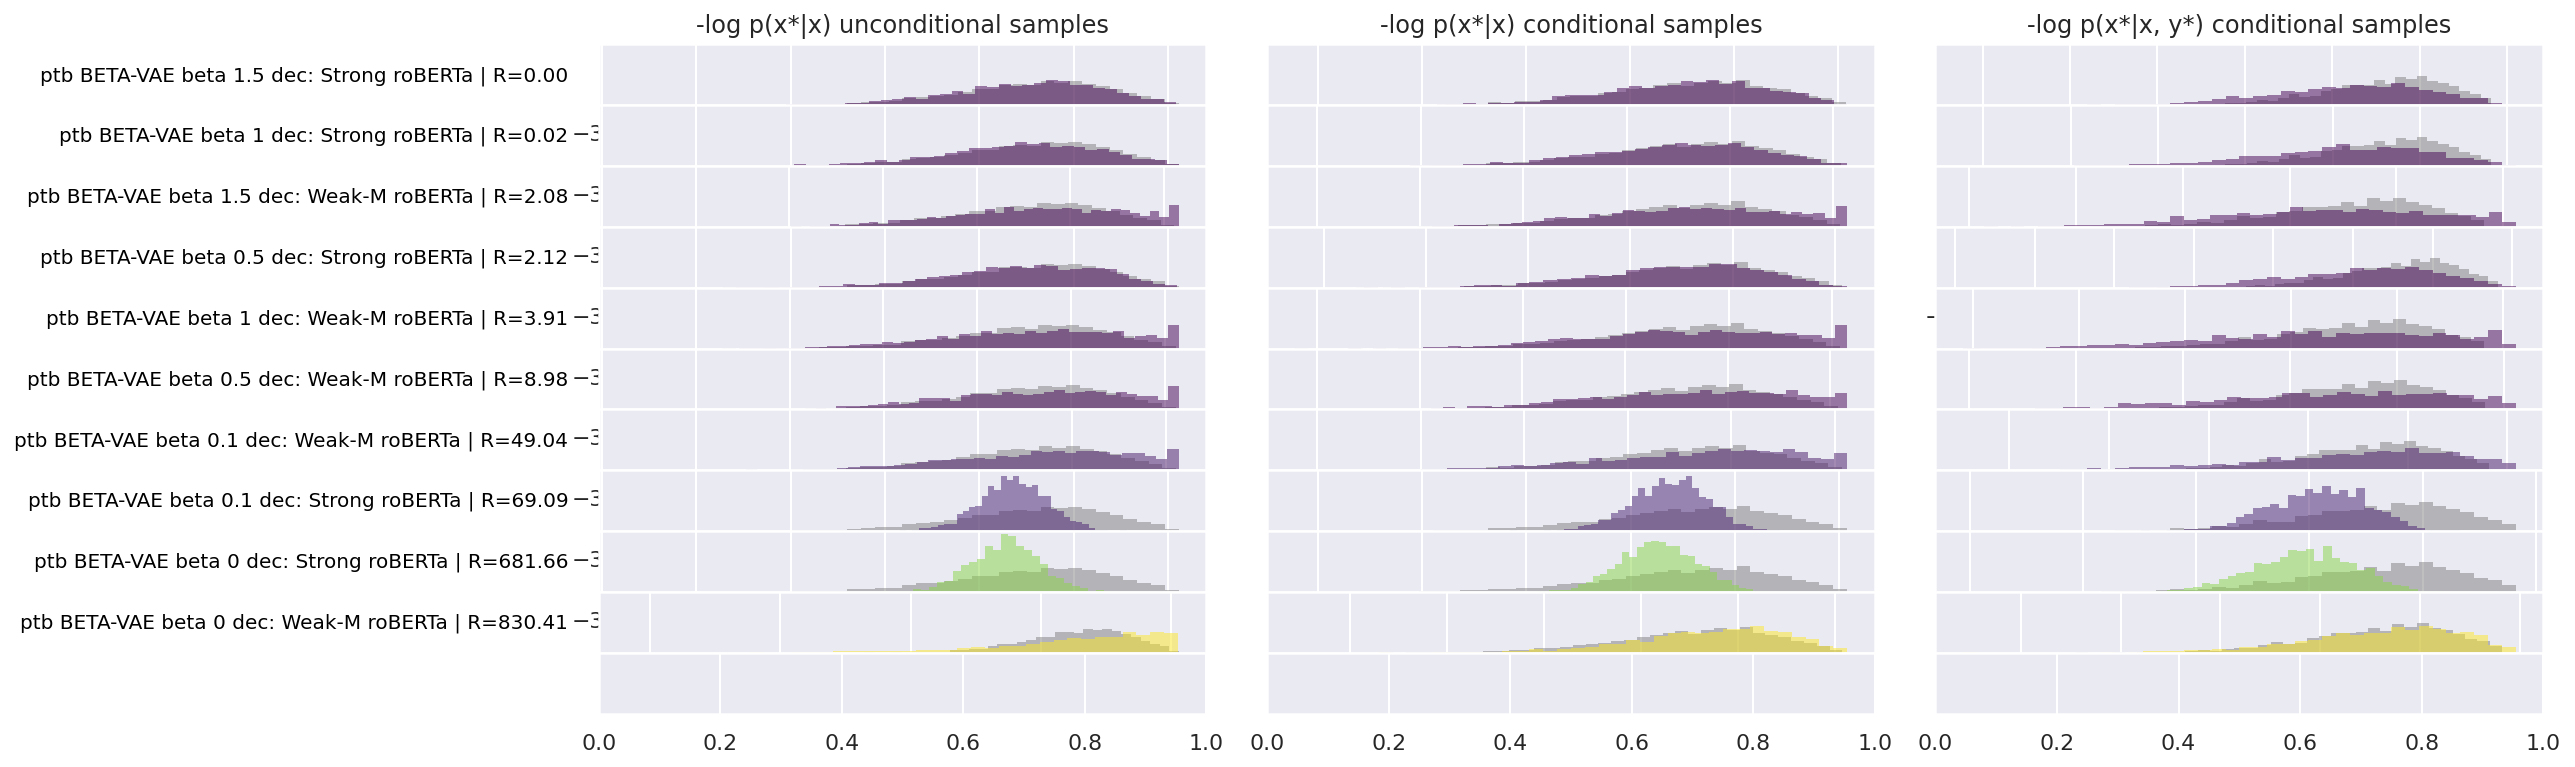

In [13]:
# ----------------------------------------------------------------------------------------------------
# sort_on, sort_name, sort_ascend = 'valid-MMD', 'MMD', True                  # valid MMD
# sort_on, sort_name, sort_ascend = 'valid-elbo mean', 'ELBO', True                # valid ELBO
sort_on, sort_name, sort_ascend = 'valid-kl_prior_post mean', 'R', True          # valid R
# sort_on, sort_name, sort_ascend = 'valid-distortion mean', 'D', True             # valid D mean

# sort_on, sort_name, sort_ascend = 'surpr_sample', 'surpr. samples', True         # LL samples
# sort_on, sort_name, sort_ascend = 'surpr_data_valid', 'surpr. data', True        # LL valid data samples
# sort_on, sort_name, sort_ascend = 'surpr_recons_valid', 'surpr. recons', True    # LL valid reconstructions

# ----------------------------------------------------------------------------------------------------
model_cols = ['unconditional_unconditional', 'unconditional_conditional', 'conditional_conditional']
model_col_names = ["-log p(x*|x) unconditional samples", "-log p(x*|x) conditional samples", "-log p(x*|x, y*) conditional samples"]

ncols = len(model_cols)
nrows = len(surprisal_values.keys())

print("Rows, cols:", ncols, nrows)
# nrows = 4

hist_kwargs = dict(lw=0, alpha=0.5, density=True, bins=40)

df_sort_on = global_stats_df.sort_values(sort_on, ascending=sort_ascend)[sort_on]
sort_on_labels, sort_on_values = df_sort_on.index, df_sort_on.values
labels = [f"{l} | {sort_name}={v:.2f}" for l, v in zip(sort_on_labels, sort_on_values)]

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*6, nrows*0.5), sharey=True)

minima, maxima = min(sort_on_values), max(sort_on_values)
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

for col, col_name in enumerate(model_cols):
    row = 0
    for idx, group_name in enumerate(sort_on_labels):
        
        color = mapper.to_rgba(sort_on_values[row])
        
        axs[row, col].hist(surprisal_values["data_group"][model_cols[col]], color="grey", **hist_kwargs)
        axs[row, col].hist(surprisal_values[group_name][model_cols[col]], color=color, **hist_kwargs)
        
        if col == 0:
            axs[row, col].text(-0.05, .5, labels[row], color='black', fontsize=10, ha="right", va="center", 
                               transform=axs[row, col].transAxes)
        
        axs[row, col].set_yticks([])
#         axs[row, col].set_xlim([-20, 300])
        
        if row == 0:
            axs[row, col].set_title(model_col_names[col])
        
#         if row == 3: break
            
        row += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.0)

# Analyse surprisal distribution with a DP mixture of truncated normals

In [16]:
dp_mixtures = dict()

MAX_SAMPLES_PER_GROUP = 200

NUM_COMPS = 3
NUM_CHAINS = 1
NUM_WARMUP = 100
NUM_SAMPLES = 1000

for stat_name in model_cols:
    print(stat_name)

    group_names = []
    observations = []

    for k, v in surprisal_values.items():
        group_names.append(k)
        observations.append(np.array(v[stat_name][:MAX_SAMPLES_PER_GROUP]))

    dp_mixture = DPMixture(
        group_names, 
        observations, 
        obs_dist="truncated_normal", 
        DP_alpha=1., 
        num_comps=NUM_COMPS, 
        num_samples=NUM_SAMPLES, 
        num_chains=NUM_CHAINS, 
        num_warmup=NUM_WARMUP
    )

    dp_mixture.run()

    dp_mixtures[stat_name] = dp_mixture

I0104 08:27:20.571184 23131099492096 tpu_client.py:54] Starting the local TPU driver.
I0104 08:27:20.573926 23131099492096 xla_bridge.py:231] Unable to initialize backend 'tpu_driver': Not found: Unable to find driver in registry given worker: local://
I0104 08:27:20.575694 23131099492096 xla_bridge.py:231] Unable to initialize backend 'gpu': Not found: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
I0104 08:27:20.577229 23131099492096 xla_bridge.py:231] Unable to initialize backend 'tpu': Invalid argument: TpuPlatform is not available.


unconditional_unconditional


sample: 100%|██████████| 1100/1100 [00:16<00:00, 67.43it/s, 63 steps of size 4.53e-02. acc. prob=0.96] 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
 beta[0,0]      0.52      0.04      0.52      0.46      0.59   1118.05      1.00
 beta[0,1]      0.06      0.05      0.05      0.00      0.13    928.53      1.00
 beta[1,0]      0.60      0.04      0.60      0.54      0.67   1199.54      1.00
 beta[1,1]      0.05      0.05      0.03      0.00      0.12    941.43      1.00
 beta[2,0]      0.49      0.05      0.50      0.43      0.57   1447.47      1.00
 beta[2,1]      0.12      0.08      0.11      0.00      0.22    899.97      1.00
 beta[3,0]      0.58      0.04      0.58      0.51      0.63   2245.80      1.00
 beta[3,1]      0.05      0.04      0.04      0.00      0.11   1040.07      1.00
 beta[4,0]      0.60      0.04      0.60      0.53      0.66   1024.55      1.00
 beta[4,1]      0.05      0.04      0.04      0.00      0.11   1049.70      1.00
 beta[5,0]      0.48      0.05      0.48      0.40      0.55   1324.18      1.00
 beta[5,1]      0.09      0

sample: 100%|██████████| 1100/1100 [00:12<00:00, 84.66it/s, 31 steps of size 5.16e-02. acc. prob=0.94]  



                mean       std    median      5.0%     95.0%     n_eff     r_hat
 beta[0,0]      0.44      0.04      0.44      0.38      0.52   1159.74      1.00
 beta[0,1]      0.04      0.04      0.03      0.00      0.09   1184.07      1.00
 beta[1,0]      0.59      0.04      0.59      0.52      0.65   1228.80      1.00
 beta[1,1]      0.03      0.03      0.02      0.00      0.08   1245.01      1.00
 beta[2,0]      0.54      0.05      0.54      0.46      0.61   1337.86      1.00
 beta[2,1]      0.10      0.08      0.07      0.00      0.21    856.89      1.00
 beta[3,0]      0.55      0.04      0.55      0.50      0.62   1059.19      1.00
 beta[3,1]      0.03      0.03      0.02      0.00      0.07   2133.53      1.00
 beta[4,0]      0.62      0.04      0.62      0.55      0.68   1730.53      1.00
 beta[4,1]      0.04      0.03      0.03      0.00      0.08    864.13      1.00
 beta[5,0]      0.43      0.04      0.43      0.36      0.50   1109.01      1.00
 beta[5,1]      0.05      0

sample: 100%|██████████| 1100/1100 [00:09<00:00, 120.55it/s, 31 steps of size 1.26e-01. acc. prob=0.92]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
 beta[0,0]      0.42      0.04      0.42      0.35      0.48   1233.84      1.00
 beta[0,1]      0.04      0.04      0.03      0.00      0.09   1605.74      1.00
 beta[1,0]      0.57      0.04      0.58      0.51      0.64    901.32      1.00
 beta[1,1]      0.04      0.04      0.03      0.00      0.09   1294.96      1.00
 beta[2,0]      0.48      0.05      0.48      0.39      0.54   1221.29      1.00
 beta[2,1]      0.10      0.07      0.08      0.00      0.20   1433.09      1.00
 beta[3,0]      0.53      0.04      0.53      0.46      0.58   1354.50      1.00
 beta[3,1]      0.03      0.03      0.02      0.00      0.07   1605.65      1.00
 beta[4,0]      0.60      0.04      0.60      0.54      0.67   1138.02      1.00
 beta[4,1]      0.04      0.03      0.03      0.00      0.08   1359.76      1.00
 beta[5,0]      0.38      0.04      0.38      0.32      0.45    898.93      1.00
 beta[5,1]      0.04      0

# Plot the DP Mixture fits on surprisal values

UNCONDITIONAL_UNCONDITIONAL


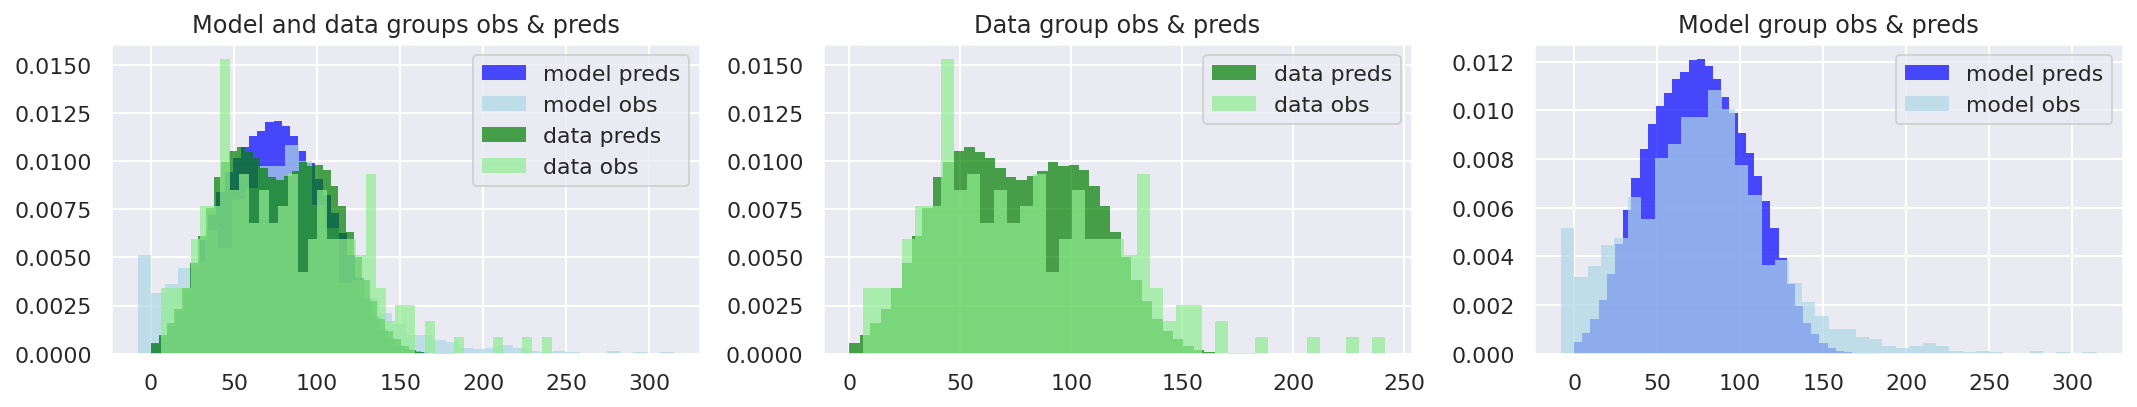

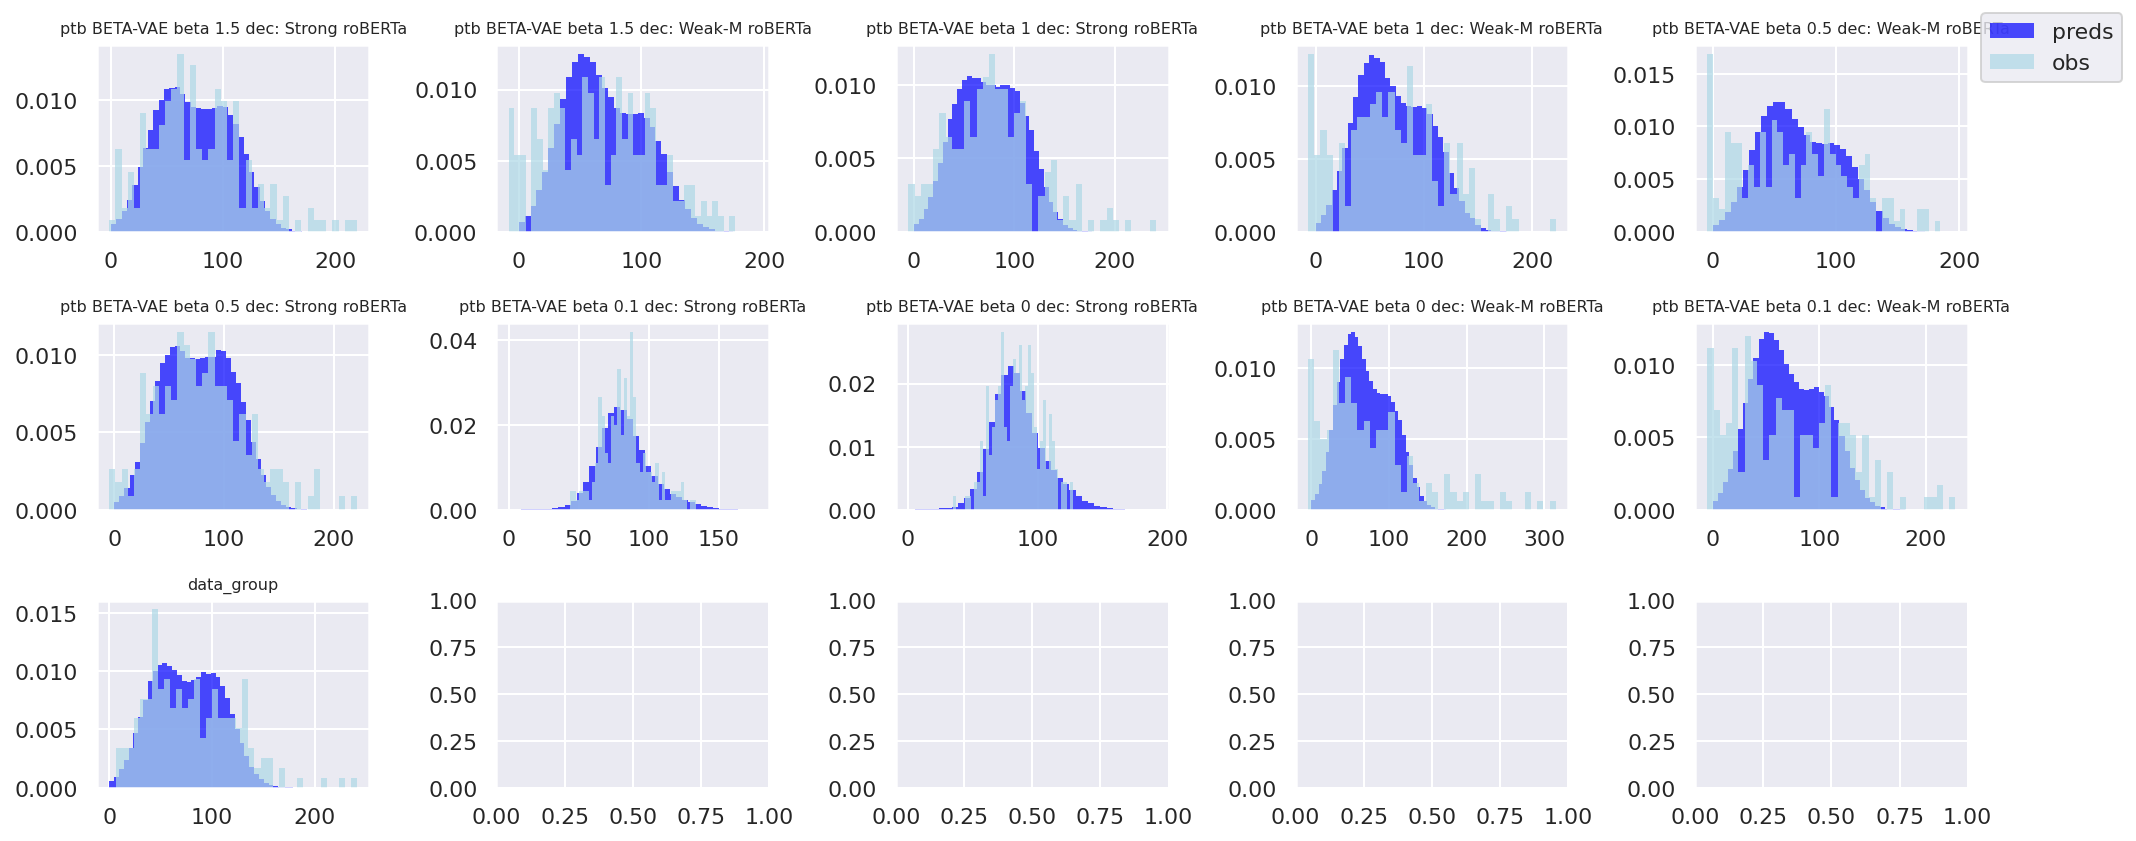

UNCONDITIONAL_CONDITIONAL


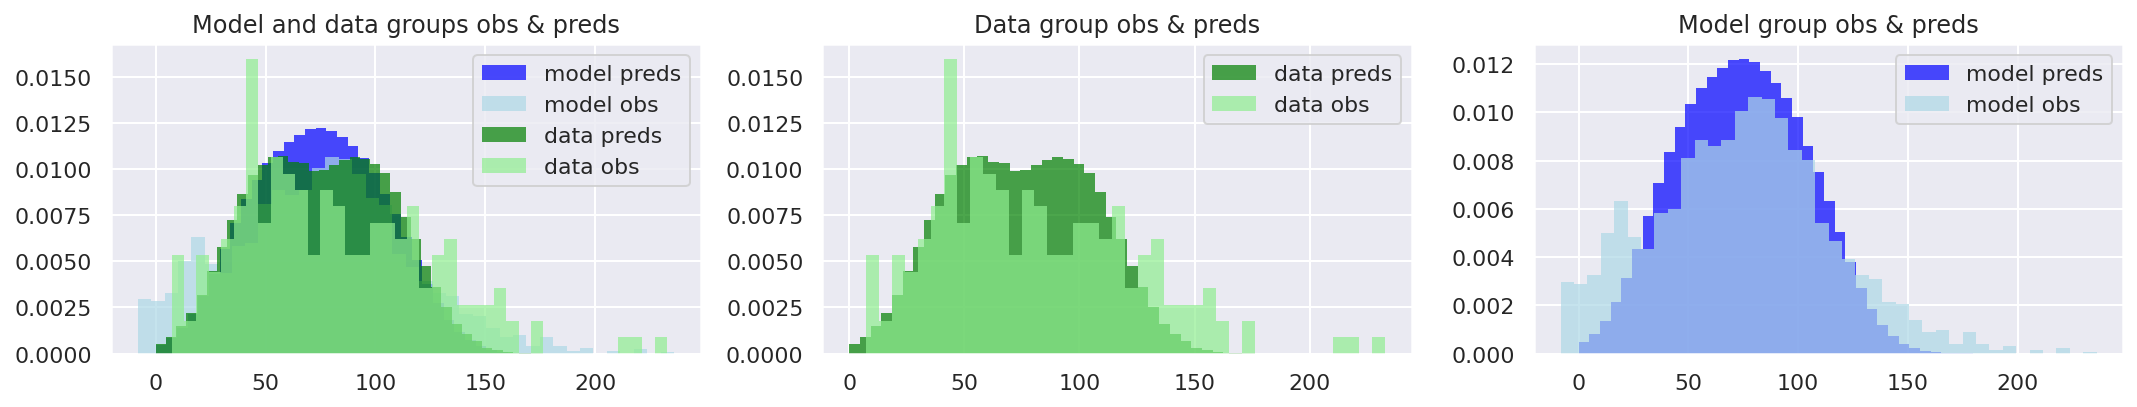

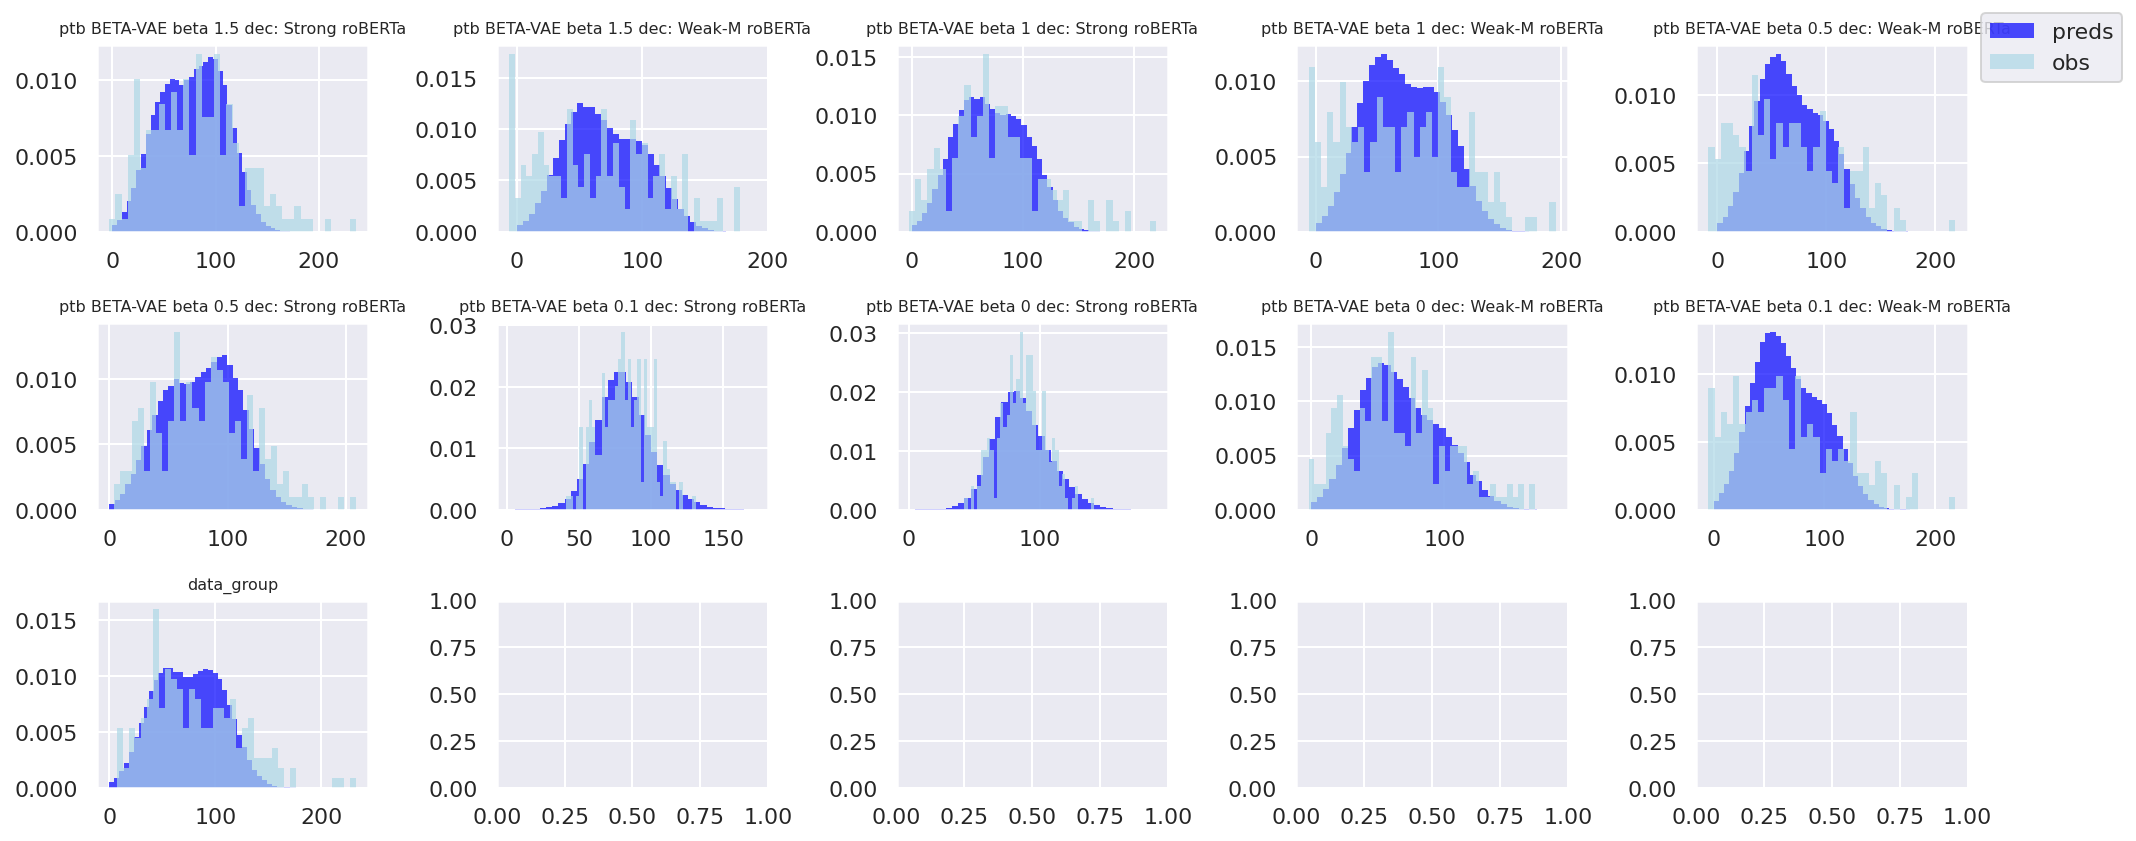

CONDITIONAL_CONDITIONAL


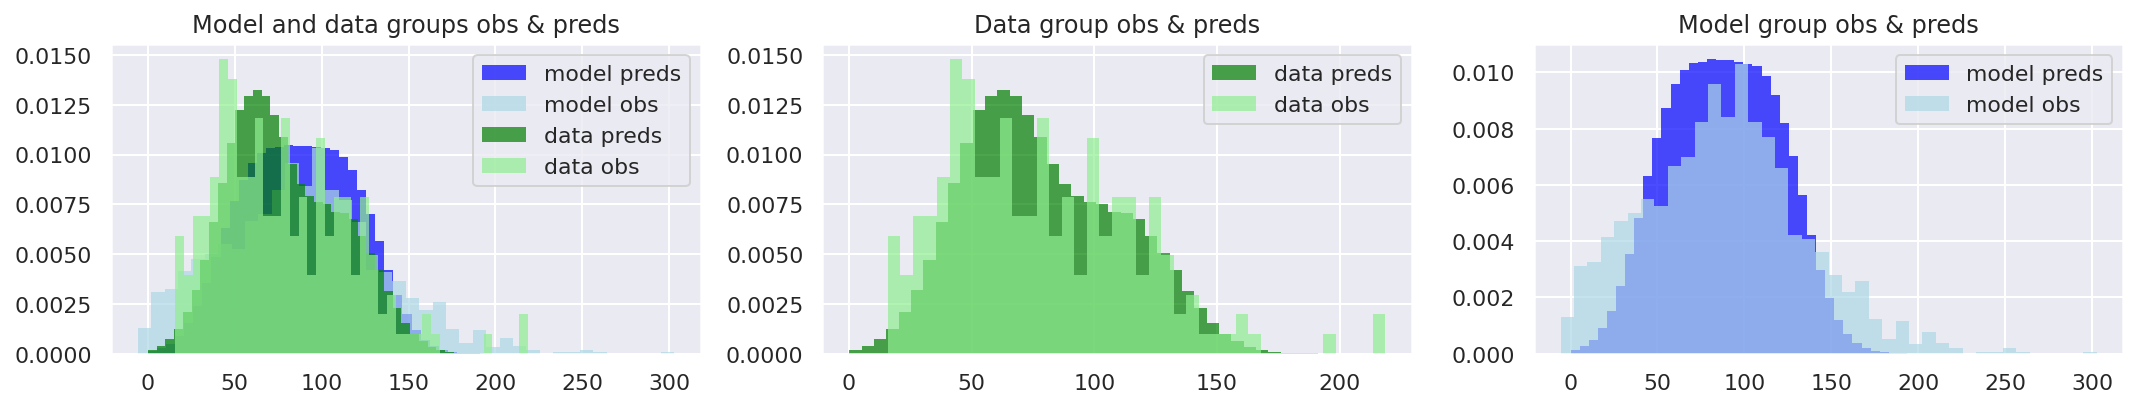

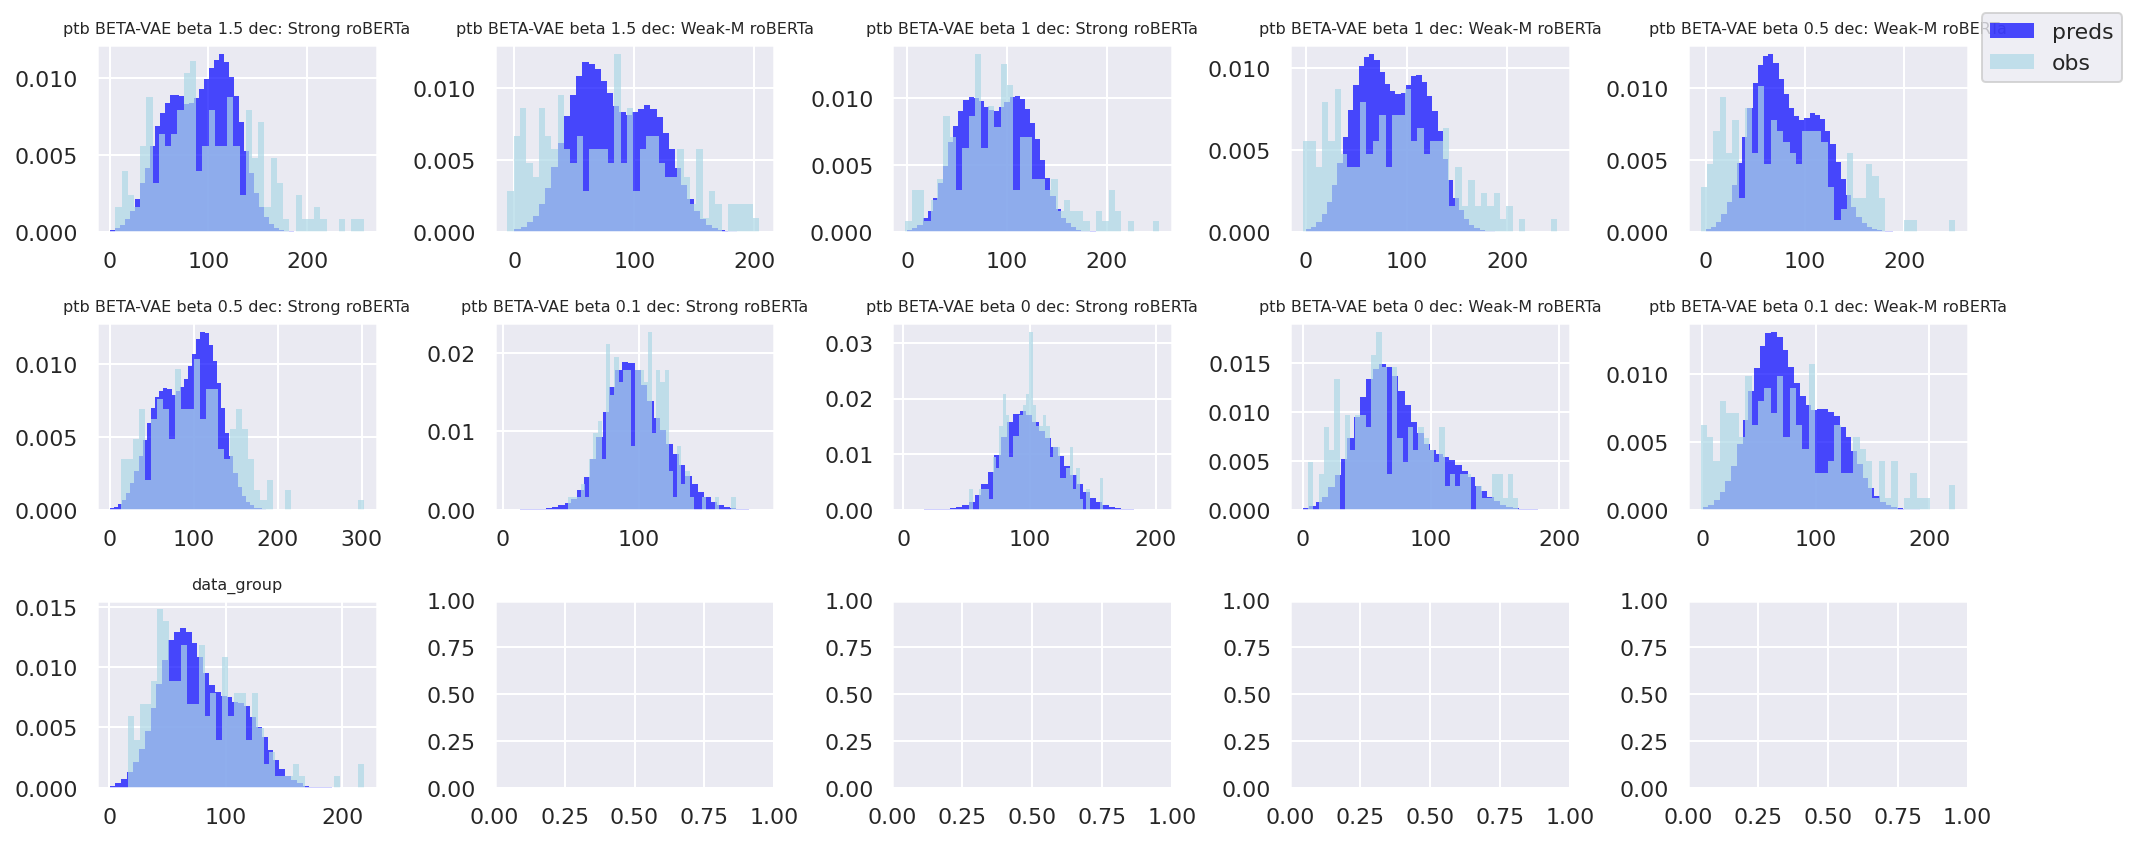

In [17]:
for stat, dp_mixture in dp_mixtures.items():
    print(stat.upper())

    plot_model_data_preds_obs(dp_mixture)
    plot_all_groups_preds_obs(dp_mixture)

# Now assess "divergence" from model sample surprisal values from data group in three ways:

1. KL between component assignments under the DP Mixture
2. Difference between estimated densities under the DP Mixture
3. Wasserstein distance between surprisal value histograms (no DP Mixture used)

In [18]:
all_df = compute_all_divergences_data_model_groups(dp_mixtures, surprisal_values)

UNCONDITIONAL_UNCONDITIONAL
UNCONDITIONAL_CONDITIONAL
CONDITIONAL_CONDITIONAL


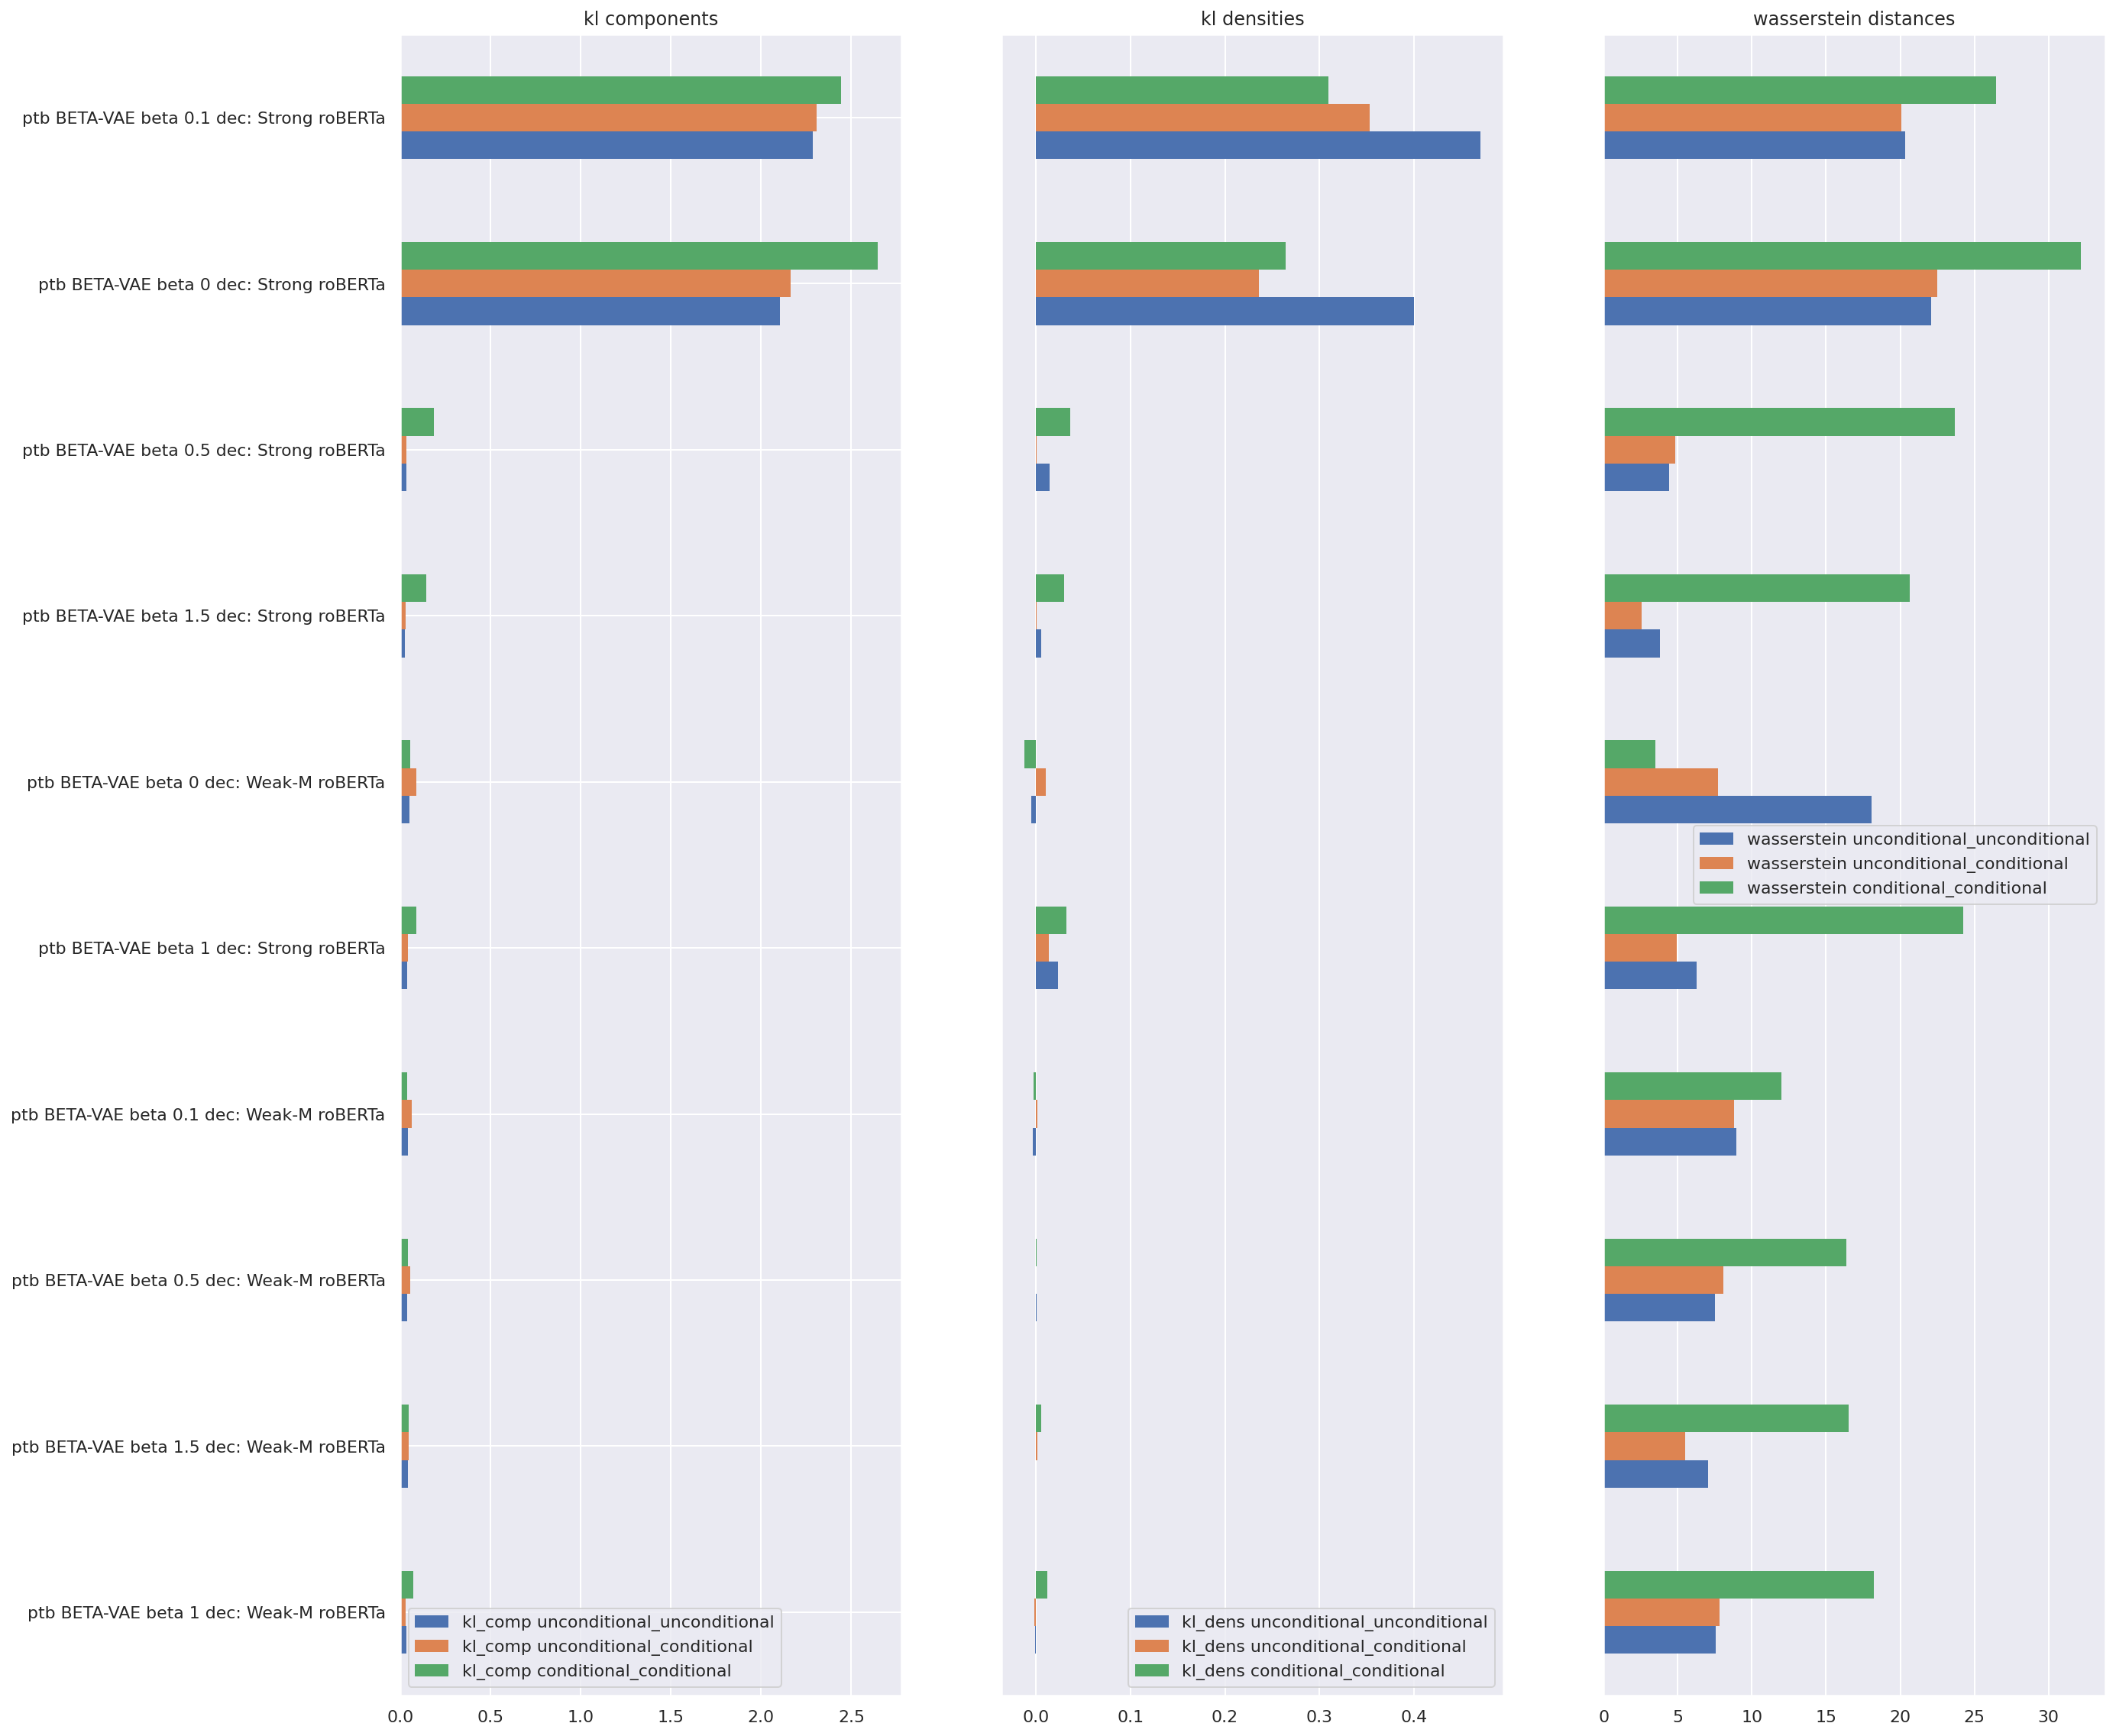

In [19]:
SORT_ON = "kl_comp sum"
plot_divergences_data_model_groups(all_df, sort_on=SORT_ON, plot_only=None)

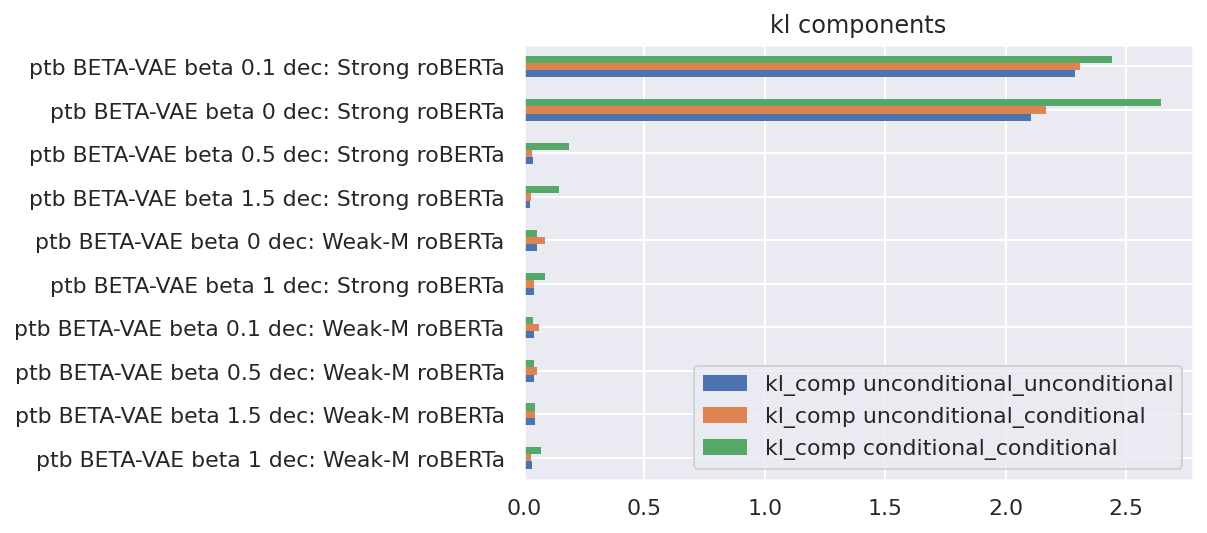

In [20]:
plot_divergences_data_model_groups(all_df, sort_on=SORT_ON, plot_only="kl_comp")

In [ ]:
all_df

# Old code below

In [ ]:
# CODE_DIR = "/home/cbarkhof/fall-2021"
# ANALYSIS_DIR = f"{CODE_DIR}/analysis/analysis-files"
# SAMPLE_FILE = f"generative-samples.pt"
# CONDITIONAL_SAMPLE_FILE = f"generative-conditional-samples.pt"

# MAX_MODEL_SAMPLES = 2000
# MODEL_SAMPLE_DIR = "/home/cbarkhof/fall-2021/clean_analysis/model_samples"

# ptb_model_text_samples = dict()

# for i, (clean_name, row) in enumerate(overview_df.iterrows()):
#     print(i, clean_name)
    
#     save_dir = f"{ANALYSIS_DIR}/{row.run_name}"
#     conditional_sample_file = f"{save_dir}/{CONDITIONAL_SAMPLE_FILE}"
#     sample_file = f"{save_dir}/{SAMPLE_FILE}"
    
#     res = dict()
    
#     if os.path.exists(conditional_sample_file):
#         cond_samples = torch.load(conditional_sample_file)
#         res["conditional_original_text"] = cond_samples["valid"]["original_input_text"][:MAX_MODEL_SAMPLES]
#         res["conditional_sampled_text"] = cond_samples["valid"]["condtional_sample_text"][:MAX_MODEL_SAMPLES]
    
#     if os.path.exists(sample_file):
#         samples = torch.load(sample_file)
#         res["unconditional_sampled_text"] = samples["text"][:MAX_MODEL_SAMPLES] 
    
#     os.makedirs(MODEL_SAMPLE_DIR + "/" + row.run_name, exist_ok=True)
#     torch.save(res, MODEL_SAMPLE_DIR + "/" + row.run_name + "/" + "conditional_unconditional_samples.pt")